In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


Reading the data

Creating Independent and Dependent Variables

In [2]:
# Reading the data
dataset = pd.read_csv("Dataset/maxwell.arff.csv")



x = np.array(dataset.drop(['Effort'],axis=1))
y = np.array(dataset['Effort'])

Scaling the data

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(x)
y=np.reshape(y,(62,1))
y=scaler.fit_transform(y)

 Splitting the dataset into training and testing set (80/20)

In [4]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state =67)

In [5]:
x_train

array([[0.05730181, 0.33333333, 0.5       , 0.5       , 0.        ,
        0.33333333, 0.5       , 1.        , 0.25      , 0.33333333,
        0.66666667, 1.        , 0.66666667, 0.33333333, 0.25      ,
        0.5       , 0.5       ],
       [0.09429764, 0.33333333, 0.25      , 0.75      , 0.33333333,
        0.        , 0.25      , 0.33333333, 0.5       , 0.66666667,
        1.        , 0.66666667, 0.66666667, 0.66666667, 0.5       ,
        0.5       , 0.75      ],
       [0.1596662 , 1.        , 0.25      , 0.5       , 0.33333333,
        0.66666667, 0.5       , 0.66666667, 0.5       , 0.66666667,
        0.66666667, 0.33333333, 0.66666667, 0.33333333, 0.25      ,
        0.75      , 0.5       ],
       [0.0403338 , 0.33333333, 0.75      , 0.75      , 0.        ,
        0.33333333, 0.75      , 0.66666667, 0.25      , 0.        ,
        0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.25      ,
        0.75      , 0.75      ],
       [0.05591099, 0.33333333, 0.25      , 0.5     

Stacking Model

In [6]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


estimators = [('kn', KNeighborsRegressor()),('svr', SVR()),('dt', DecisionTreeRegressor())]

level1 = LinearRegression()
model = StackingRegressor(estimators=estimators, final_estimator=level1, cv=5)

In [7]:

# Train the model 
model.fit(x_train, y_train.ravel())

StackingRegressor(cv=5,
                  estimators=[('kn', KNeighborsRegressor()), ('svr', SVR()),
                              ('dt', DecisionTreeRegressor())],
                  final_estimator=LinearRegression())

Predicting the Close Price

In [8]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

In [9]:
y_pred=np.reshape(y_pred,(13,1))
y_test=np.reshape(y_test,(13,1))

Finding the RMSE and MAPE

Definition of Mean Absolute Percentage Error

In [10]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [11]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [12]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-model.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.02722608677576568

RMSE:
 0.16500329322703133

MAPE:
 371.8058265000212

SMAPE:
 91.89

 Adj R2 score:
 0.3579774348010446


In [13]:

y_pred=scaler.inverse_transform(y_pred)

In [14]:


y_test=scaler.inverse_transform(y_test)

In [15]:

y_test=np.reshape(y_test,(13,))
y_pred=np.reshape(y_pred,(13,))

In [16]:
dfr=pd.DataFrame({'Actual effort':y_test, 'Predicted effort':y_pred})
print(dfr)

    Actual effort  Predicted effort
0          5279.0      22481.157695
1          3600.0       6741.017950
2          1060.0       5668.280742
3         11900.0       9016.396846
4          4456.0       6723.039255
5          7320.0       8107.231330
6           845.0       5676.412236
7          1520.0       2270.835756
8         39479.0      11198.466625
9         25910.0      40659.367867
10         1233.0       4174.695248
11         9369.0       5754.191654
12          900.0       3285.158657


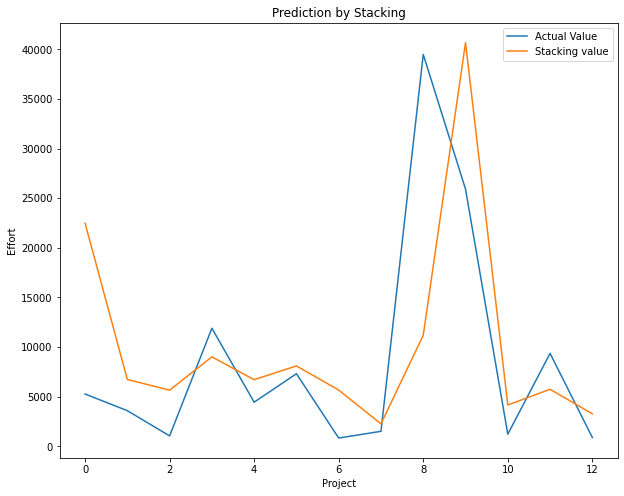

In [17]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Stacking value")
plt.title("Prediction by Stacking")
plt.xlabel("Project")
plt.ylabel("Effort")
plt.legend()
plt.show()